# (Titanic Data Exploration)
## by (Osama Mohamed Saad Elahwel)

## Preliminary Wrangling

> This document explores a dataset containing survival state of passengers of the Titanic and attributes for 891 passengers .

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [42]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [43]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# More over view
print(titanic.shape)
print(titanic.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


First I will make some data cleaning some feature enginnearing to the dataset

In [45]:
# Add new column that indicate the embarked city by its name insted of small labels
titanic['embark_town'] = 'NaN'
titanic.loc[titanic.Embarked == 'S' , 'embark_town'] ='Southampton'
titanic.loc[titanic.Embarked == 'C' , 'embark_town'] ='Cherbourg'
titanic.loc[titanic.Embarked == 'Q' , 'embark_town'] ='Queenstown'

In [46]:
#Making new column named alive that indicate the state of the passenger living instead of 1 and 0
titanic['alive'] = 'NaN'
titanic.loc[titanic.Survived == 1 , 'alive'] , titanic.loc[titanic.Survived == 0 , 'alive'] = 'yes' , 'no'

In [47]:
#Making a new boolian column that indicate if the passenger is alone or not  
titanic['alone'] = True
titanic.loc[((titanic.SibSp == 0) &(titanic.Parch == 0) )  , 'alone'] , titanic.loc[titanic.SibSp != 0 , 'alone'] = True , False

In [48]:
#Making new column that indicate the Pclass in terms on strings named class 
titanic['class'] = "NaN"
titanic.loc[titanic.Pclass == 1 , 'class'] ='First'
titanic.loc[titanic.Pclass == 2 , 'class'] ='Second'
titanic.loc[titanic.Pclass == 3 , 'class'] ='Third'

In [49]:
#Filling nan values in age column by mean of the title on the passengers Mr, Ms etc as they are more likely to be in the same age.
titanic.Name = titanic.Name.str.extract(' ([A-Za-z]+)\.')
titanic.Age.fillna(titanic.groupby('Name')['Age'].transform('median') , inplace = True)

In [50]:
# new column that indicate if the passenger is child, Man or woman 
titanic['who'] = 'NaN'
titanic.loc[titanic.Age <= 15 , 'who'] ='child'
titanic.loc[(titanic.Age > 15) & (titanic.Sex == 'male'), 'who'] ='man'
titanic.loc[(titanic.Age > 15) & (titanic.Sex == 'female'), 'who'] ='woman'

In [51]:
print(titanic.who.value_counts())

man      533
woman    271
child     87
Name: who, dtype: int64


In [52]:
titanic.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
embark_town      0
alive            0
alone            0
class            0
who              0
dtype: int64

In [53]:
#Drop the 2 null values in the embark_town column
titanic.drop(titanic.query("embark_town == 'NaN'").index, inplace = True)

In [54]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.343836,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.231853,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
#Droping unnessesary columns
colmns = ['PassengerId' , 'Ticket' , 'Cabin' , 'Pclass' ,'Parch','SibSp' ]
titanic.drop(colmns , axis = 1 , inplace= True)

In [56]:
#Lowering case columns names
titanic.columns = titanic.columns.str.lower()

In [57]:
# convert class into ordered categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories =['First' , 'Second' , 'Third'] )
titanic['class'] = titanic['class'].astype(ordered_var)

In [58]:
titanic.head()

,survived,name,sex,age,fare,embarked,embark_town,alive,alone,class,who
0,0,Mr,male,22.0,7.2500,S,Southampton,no,False,Third,man
1,1,Mrs,female,38.0,71.2833,C,Cherbourg,yes,False,First,woman
2,1,Miss,female,26.0,7.9250,S,Southampton,yes,True,Third,woman
3,1,Mrs,female,35.0,53.1000,S,Southampton,yes,False,First,woman
4,0,Mr,male,35.0,8.0500,S,Southampton,no,True,Third,man


### What is the structure of your dataset?

> There are 891 entries in the data with 15 attributes 
(survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone)
about half of the variabels are numeric(survived, pclass, age, sibSp, parch, fare)
other is string(sex, embarked, class, who, adult_male, deck, embark_town, alive, alone)
class: is a orderd worst --> best (Third , second , first) 
who : man , woman , child

>we see alot of missing values in the deck column but its not one of the important columns so we will ignore it, age column has missing values also we will fill these missing values with the mean of the passengers title if it affect our visualizations. 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the Survival of passengers in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think it will be who, age, class as the history shows that most of the survivals was females and childs in the older and younger age as middle aged men have the highest probablity to die and the 1st class was the highest probablity to survive as it was in the upper of the ship. 

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest:alive.

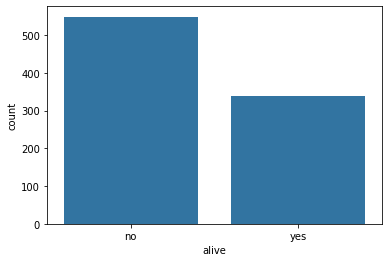

In [59]:
base = sb.color_palette()[0]
sb.countplot(data = titanic , x = 'alive' , color= base )

We can see that most of the passengers died we need to see why that happen on our way of the exploration

now, lets see :age

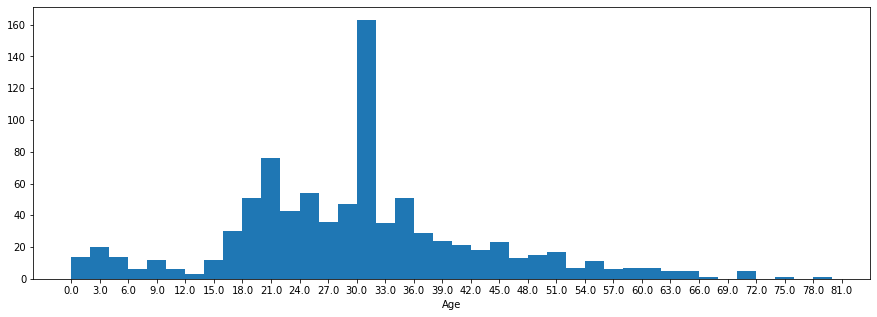

In [60]:
binsize = 2
bins = np.arange(0, titanic.age.max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = titanic, x = 'age', bins = bins)
plt.xlabel('Age')
tic = np.arange(0,titanic.age.max()+3,3)
plt.xticks(tic,tic)
plt.show()

Age distribution shows alot of passengers start from age 18 which is the legal age with a large spike from 30 to 33 and numbers decrease again from 36 to 45  and there was some children under 12 years.

lets see the three variabels: who , class , embark_town

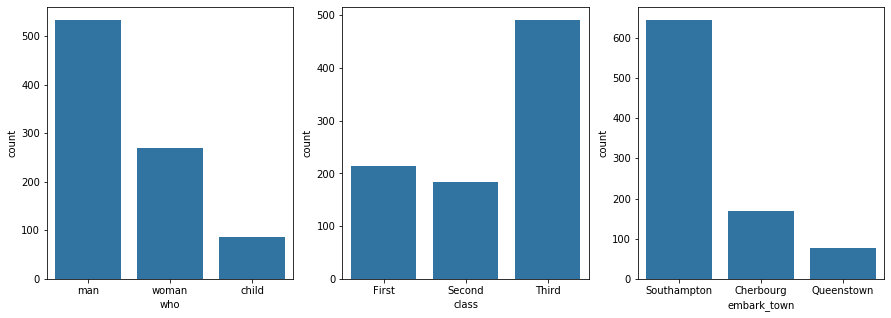

In [61]:
fig, ax = plt.subplots(ncols=3, figsize = [15,5])

default_color = sb.color_palette()[0]
sb.countplot(data = titanic, x = 'who', color = default_color, ax = ax[0])
sb.countplot(data = titanic, x = 'class', color = default_color, ax = ax[1])
sb.countplot(data = titanic, x = 'embark_town', color = default_color, ax = ax[2])
plt.show()

from the first graph we see that most of the passengers are men then women i think that is highly related to the fact that most of the passengers are died, second graph indicte that most of the passengers are in the third class, third one whows that Southampton was the highest town to embark from.

now lets see : fare

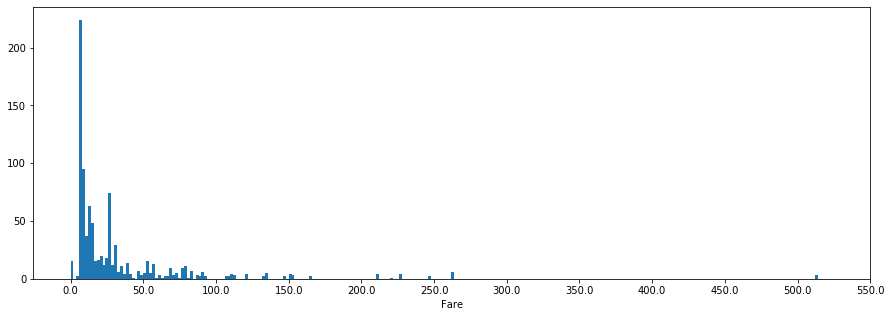

In [62]:
binsize = 2
bins = np.arange(0, titanic.fare.max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = titanic, x = 'fare', bins = bins)
plt.xlabel('Fare')
tic = np.arange(0,titanic.fare.max()+50,50)
plt.xticks(tic,tic)
plt.show()

Looks like we have an outlier here that is greater than 500 we will see how many rows with values greater than 500 and we will fix it by removing.

In [63]:
titanic.query("fare > 500")

,survived,name,sex,age,fare,embarked,embark_town,alive,alone,class,who
258,1,Miss,female,35.0,512.3292,C,Cherbourg,yes,True,First,woman
679,1,Mr,male,36.0,512.3292,C,Cherbourg,yes,True,First,man
737,1,Mr,male,35.0,512.3292,C,Cherbourg,yes,True,First,man


there is only 3 records with fre greater than 500 we will remove them and see the plot again

In [64]:
titanic.drop(titanic.query("fare > 500").index , inplace= True)

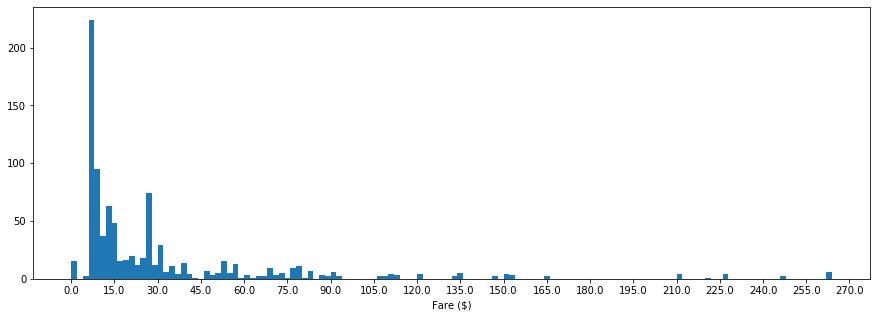

In [65]:
binsize = 2
bins = np.arange(0, titanic.fare.max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = titanic, x = 'fare', bins = bins)
plt.xlabel('Fare ($)')
tic = np.arange(0,titanic.fare.max()+15,15)
plt.xticks(tic,tic)
plt.show()

There is a very large spike in fare under 15 and another one under 30$ that may be related to the class variable lets dig more in the data to see.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> with the live variable it shows that the people whom died are more than whom lived, fare variable did have outlires  and show a large peak in the small fare area.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The fare variable had 3 values with very high value than other points that afect the visualization and with affect the mean of the data to for safety i removed them for better analysis.

>age column had null values but i think it didnt afect the distribution.

## Bivariate Exploration

>We will start with the alive to the class variabels.

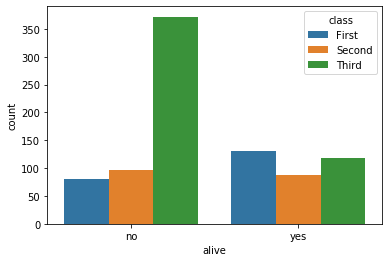

In [66]:
sb.countplot(data = titanic , x = 'alive' , hue = 'class')

From this Graph it tells us why most of the passengers died as most of them where in the third class, and many of the alive passengers where from the first class.

lets explore alive to who

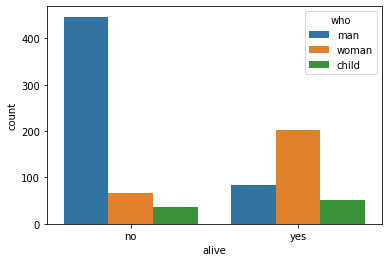

In [67]:
sb.countplot(data = titanic , x = 'alive' , hue = 'who')

we can see that most of the men died and on the other hand most of the women and children were alive that make sense as men will sacrifice to help the women and children to go to life boats.(Poor men)

we will explore age to alive

C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


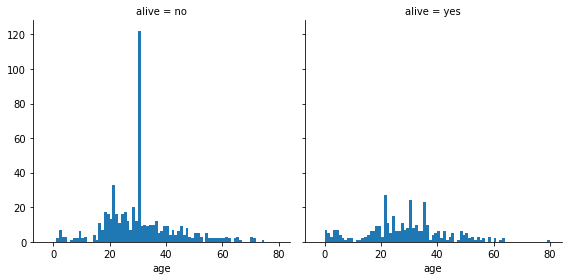

In [68]:
bin_edges = np.arange(-3, titanic.age.max()+1, 1)
g = sb.FacetGrid(data = titanic, col = 'alive' , size= 4 )
g.map(plt.hist, "age", bins = bin_edges)

The average of the people died is smaler then the people lived as we can see that there is a small peak in the childern zone whom lived same for older passengers, but most of the middle aged people died.

Explore the fare to alive

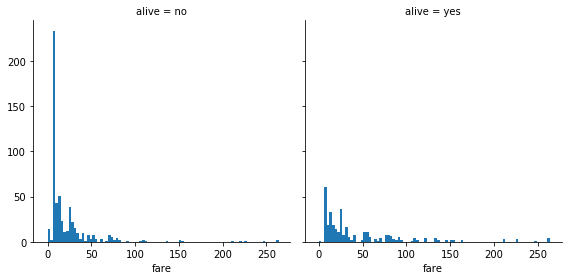

In [69]:
bin_edges = np.arange(-3, titanic.fare.max()+3, 3)
g = sb.FacetGrid(data = titanic, col = 'alive' , size= 4 )
g.map(plt.hist, "fare", bins = bin_edges)

looks like people with low fare had more chance to die that may related to the class.

fare to class

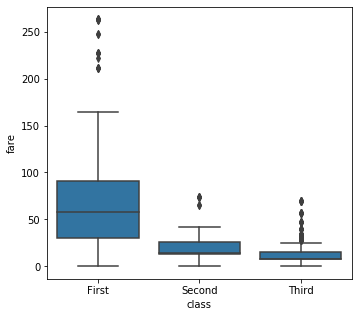

In [70]:
plt.figure(figsize= (12,5))
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = titanic, x = 'class', y = 'fare', color = base)

As expected third class has the lowest fare then second then the highest is the first class.

Lets explore the embark_town to alive

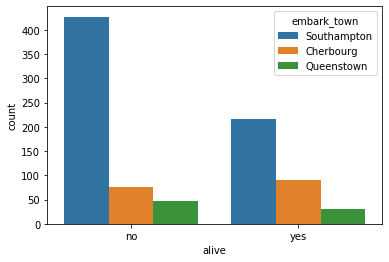

In [71]:
sb.countplot(data = titanic , x = 'alive' , hue = 'embark_town')

thats un expected passengers from Cherbourg are more likely to live unlike the other embark towns Southampton and Queenstown. (is that related to the class ?)

class to embark_town

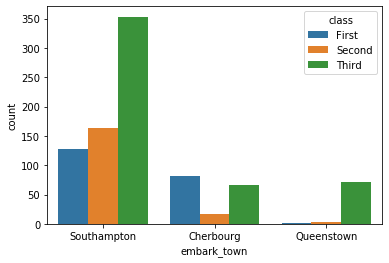

In [72]:
sb.countplot(data = titanic , hue = 'class' , x = 'embark_town')

As expected Cherbourg has more first class then oher class thats why most of its passengers were alive anlike other towns where third class is the majority.

lets see the alone variable to alive

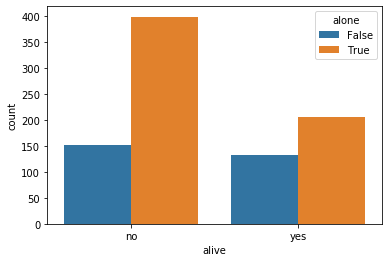

In [73]:
sb.countplot(data = titanic , hue = 'alone' , x = 'alive')

If u are alone then u have more probability to die than if u have any siblings.

lets see how age is related to alone

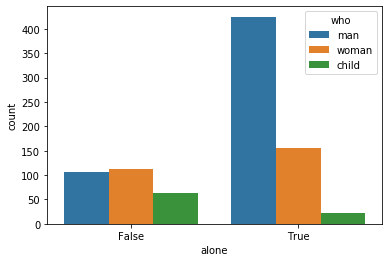

In [74]:
sb.countplot(data = titanic , x = 'alone' , hue = 'who')

C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 100)

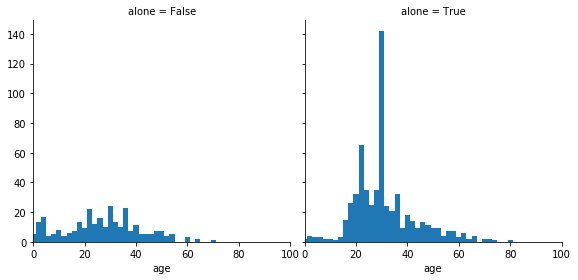

In [75]:
bin_edges = np.arange(-3, titanic.fare.max()+2, 2)
g = sb.FacetGrid(data = titanic, col = 'alone' , size= 4 )
g.map(plt.hist, "age", bins = bin_edges)
plt.xlim((0,100))

many of the middle age passengers are alone and almost all children were not alone, most of the men where alone.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Alive passengers are mostely women and cildreen but most if the men died ,Class is highly related to alive as if a passenger was from the third class that means he was more likely to die, embark town may not have strong correlation to the pagssenger death but cherbourg has more alive passenger then dead ones as most of its passengers where from the first and third class whom had high prop to live for them passengers, middle aged passengers are more likely to die as most of them were in the third class which is the Danger zone.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of middle age passengers where alone, many of men where alone and most of the alone passengers died.

## Multivariate Exploration

>Lets create some Multivariate graphs and will start with alive,class,sex

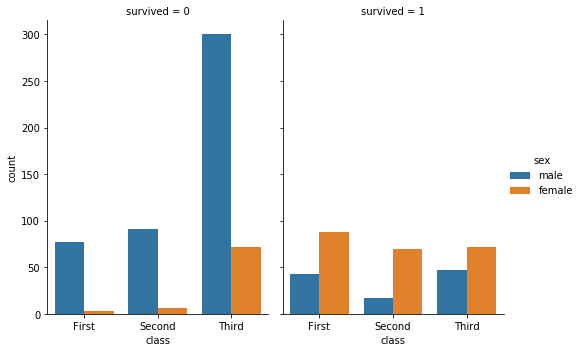

In [76]:
sb.catplot(data=titanic, x="class", hue="sex", col="survived" , kind="count",height=5, aspect=.7);

Like what we found most of the men where in the third class and most of them died unlike women whom almost survived and most of them in the first and second class.

lets look at age,alive and class

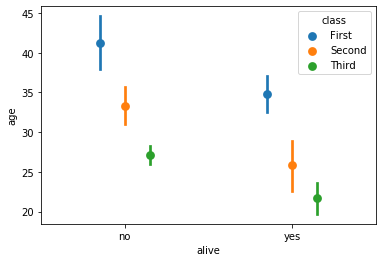

In [77]:
ax = sb.pointplot(data = titanic, x = 'alive', y = 'age', hue = 'class',
                  dodge = 0.3, linestyles = "")

that plot shows that younger age of every class are more likely to live, as even if some passengers where in the first class where they had high probability to live they may die if they were old and same for other classes.

now lets see class,sex,age and fare

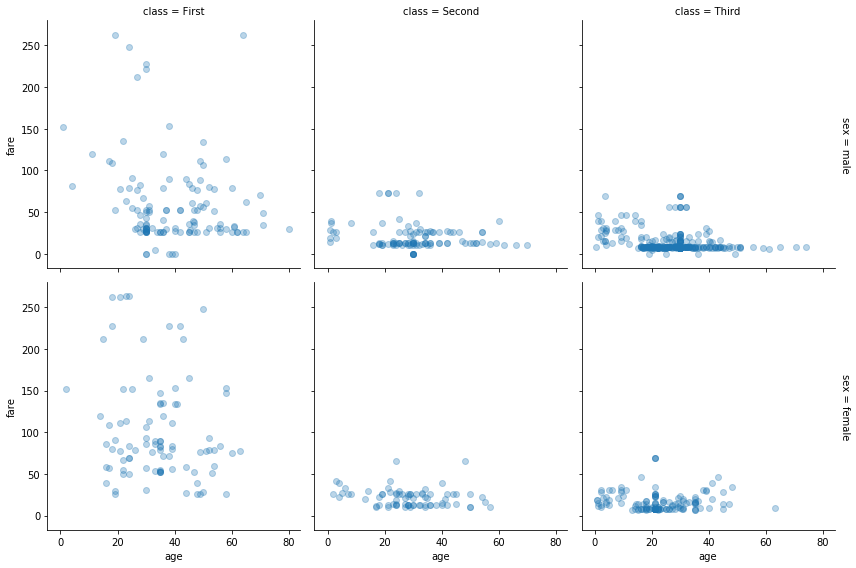

In [78]:
g = sb.FacetGrid(data = titanic, col = 'class' , row = 'sex', height = 4,
                margin_titles = True , )
g.map(plt.scatter, 'age', 'fare' ,alpha = 0.3 )

Men and women are more likely to be in the third class with the lowest price, with increase in class you will find less passengers in men and women, in second class women in average are younger then men.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I wanted to see on Multivariate the effect of age and class and as i expected younger passengers are more likely to live and for the Class,sex and alive it shows as before most of the men are in third class and female passengers are more likely to live and be in the first class.  

### Were there any interesting or surprising interactions between features?

> Yes in the age,class,alive plot i thought if you are in first class then u have high probablity to live regardless of your age but i found that if u are in the young according to the age fo each class then u have higher probability to live.